In [43]:
# 外部ライブラリのインポート
import numpy as np

# 自作パッケージのインポート
from libs.Horcher_model import Horcher_model

In [44]:
# モデルの定義
model = Horcher_model(2,2)
# 外生変数の設定
exog = {
    't_ij': np.array([
        [45, 75],
        [75, 30]
    ])/(60*24),
    'tau_ij': np.array([
        [0.006, 0.010],
        [0.010, 0.005]
    ]),
    'p_i': np.array([1.0, 1.0]), 
    'L_i': np.array([50, 50])
}
# パラメータの設定
param = {    
    'alpha': 0.80,
    'beta':  0.75,
    'gamma': 9/24,
    'psi':   0.25,
    'L':     1,
    'T':     8/24,
    'N':     100
}
# 基準均衡時の内生変数の設定
ref = {
    'lambda_ij': np.array([
        [0.25, 0.30],
        [0.05, 0.40]
    ]),
    'q_i':   np.array([0.90, 1.1]),
    'Q_j':   np.array([1.5, 1.5]),
    'w_j':   np.array([0.95, 1.05])
}

In [45]:
# 1.外生変数の入力
model.set_exog(exog)

p_i array has been stored.
L_i array has been stored.
tau_ij array has been stored.
t_ij array has been stored.


In [46]:
# 2.パラメータの入力
model.set_param(param)

In [47]:
# 3.基準均衡時の内生変数の入力
model.set_ref(ref)

q_i array has been stored.
Q_j array has been stored.
w_j array has been stored.
lambda_ij array has been stored.
### Check the setting of reference variables ###
N_R_i: 居住人口
[55. 45.]
N_W_j: 就業人口
[30. 70.]
M_R_i: 労働供給
[54.9034749  47.21780604]
M_W_j: 労働需要
[30.57915058 71.54213037]
v_ij: 時間価値
[[2.58925714 2.69837838]
 [2.43891892 2.95058824]]
C_ij: 一人当たり基本財消費量
[[0.72822857 0.75891892]
 [0.68594595 0.82985294]]
H_R_ij: 一人当たり居住地面積
[[0.26971429 0.28108108]
 [0.20786241 0.25147059]]
H_R_i: 居住地面積
[15.17528958 11.09813557]
################################################


### Check the regression result ###
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     45.36
Date:                Sun, 14 Jul 2024   Prob (F-statistic):             0.0213
Time:                        00:04:24   Log-Likelihood:                 1.5034
No. Observations:                   4   AIC:                            0.9931
Df Residuals:                       2   BIC:                           -0.2343
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12

/Users/nagampere/File/horkew/.venv/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


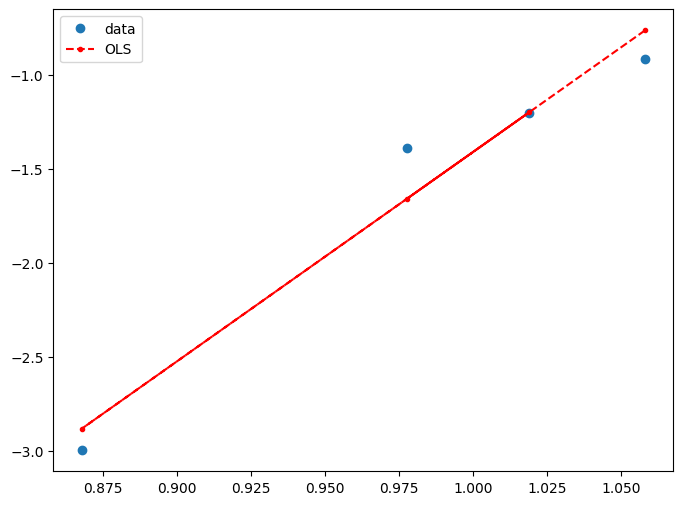

###################################


In [48]:
# 4.フレシェ分布のパラメータ-𝜖の推定
model.estimate_epsilon('OLS')

In [49]:
# 5.基準均衡時の内生変数をもとに、外生変数の推定
model.recover_fundamentals()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00018517904524770358
       x: [ 1.325e+00  6.459e-01  8.513e-01  1.157e+00]
     nit: 6
     jac: [ 3.858e-04 -7.944e-04  2.189e-04 -1.611e-04]
    nfev: 31
    njev: 6
### Check the estimation result ###
utility
[[ 52933.22018013  47949.94931291]
 [ 27210.19837528 129566.36823209]]
X_i
[1.32535947 0.64589015]
E_j
[0.85128957 1.15665833]
XE
[[1.1282647  1.53298808]
 [0.54983955 0.74707422]]
λ_ij
[[0.24377967 0.3000441 ]
 [0.06106971 0.39510652]]
Σλ_ij
0.9999999999999999
###################################
### Check the estimated variables ###
A_j: 就業地の生産レベル(外生変数)
[1.7167978  1.85990903]
xi_i: 地域iにおける商業地の相対地価(外生変数)
[1.66666667 1.36363636]
H_W_j: 商業地面積
[ 4.84169884 12.51987281]
H_i: 床面積
[20.01698842 23.61800838]
q_ave_i:  居住地の平均価格
[1.04512769 1.31203943]
φ_i: 土地賦存量に対する床面積の割合
[0.83125999 0.49573412]
H_ave_i: 仮想的な床面積の最大量(外生変数)
[118.62621598  46.83641992]
#####################################


In [50]:
# 6.現況再現性の確認
model.check_replication('root', 'hybr')

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [ 5.077e-12  9.237e-13]
       x: [ 9.506e-01  1.050e+00]
  method: hybr
    nfev: 13
    fjac: [[-9.508e-01  3.098e-01]
           [-3.098e-01 -9.508e-01]]
       r: [-4.079e+02  1.950e+02 -3.104e+02]
     qtf: [ 3.081e-08  1.699e-08]
w_j: 賃金率
[0.95064579 1.05006191]
#######################################
### Calculate the endogenous variables ###
λ_ij: 通勤割合
[[0.24613278 0.29877368]
 [0.06166119 0.39343235]]
v_ij
[[2.59102844 2.69853901]
 [2.44059447 2.95076304]]
q_i: 居住用地価
[0.89755696 1.09974061]
Q_j: 業務用地価
[1.49592827 1.49964629]
q_ave_i: 土地の平均価格
[1.04598051 1.30989012]
N_R_i: 居住人口
[54.49064607 45.50935393]
N_W_j: 勤務人口
[30.77939632 69.22060368]
M_R_i: 労働供給量
[54.38638613 47.65701004]
M_W_j: 労働需要量
[31.31598098 70.7274152 ]
H_R_i: 居住地面積
[15.08249815 11.1794737 ]
H_W_j: 商業地面積
[ 4.97523944 12.38094699]
H_i: 床面積
[20.05773759 23.56042069]
Y_j: 企業の生産量
[37.2130067 92.8352058]
#####

In [51]:
# 7.外生変数の再入力
model.change_exog(
    {
        't_ij': np.array([
            [45, 60],
            [60, 15]
        ])/(60*24),
        'tau_ij': np.array([
            [0.006, 0.009],
            [0.009, 0.004]
        ])
    }
)

In [52]:
# 8.新しい外生変数による一般均衡分析と, 内生変数の導出
model.simulate_project('root', 'hybr')

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [ 2.117e-12  7.851e-13]
       x: [ 9.529e-01  1.043e+00]
  method: hybr
    nfev: 13
    fjac: [[-9.485e-01  3.166e-01]
           [-3.166e-01 -9.485e-01]]
       r: [-3.706e+02  1.550e+02 -3.238e+02]
     qtf: [-6.220e-09 -4.920e-09]
w_j: 賃金率
[0.95293903 1.04339678]
#######################################
### Calculate the endogenous variables ###
λ_ij: 通勤割合
[[0.21913777 0.29974904]
 [0.075354   0.4057592 ]]
v_ij
[[2.59731847 2.75839142]
 [2.51717073 3.02369973]]
q_i: 居住用地価
[0.88894825 1.1281112 ]
Q_j: 業務用地価
[1.48158042 1.53833345]
q_ave_i: 土地の平均価格
[1.03548295 1.3400953 ]
N_R_i: 居住人口
[51.88868088 48.11131912]
N_W_j: 勤務人口
[29.4491761 70.5508239]
M_R_i: 労働供給量
[52.51478878 51.80003908]
M_W_j: 労働需要量
[30.075284   74.23954386]
H_R_i: 居住地面積
[14.72240955 11.77221748]
H_W_j: 商業地面積
[ 4.83603717 12.58850948]
H_i: 床面積
[19.55844672 24.36072696]
Y_j: 企業の生産量
[35.82488978 96.82662638]
#####

In [53]:
# 9.一般均衡分析の結果の評価
model.evaluate_res()

In [54]:
# 評価結果の可視化
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.ticker as ticker
import matplotlib.patheffects as patheffects

# ダミーのポリゴンを作成
polygons = [
    Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]),
    Polygon([(1, 0), (1, 1), (2, 1), (2, 0)])
]

# gdfに変換
gdf = gpd.GeoDataFrame(
    model.change,
    geometry = polygons
)

def plot_change(gdf:gpd.GeoDataFrame, name:str, dir:str):
    fig, ax = plt.subplots(1, 1)
    # カラーバーの上下端を設定
    norm = Normalize(vmin=-10, vmax=10)
    gdf.plot(
        column = name,
        ax = ax,
        norm = norm,
        cmap = 'seismic',
        legend = True,
        legend_kwds={
            "label": name, 
            "format":ticker.FuncFormatter(lambda x, _: f'{int(x)}%'),
            "anchor": (0.5,2.5),
            "orientation": "horizontal",
            "shrink": 0.6,
        }
    ).set_axis_off()

    # 数字を各ジオメトリに追加
    for idx, row in gdf.iterrows():
        # ジオメトリの中央にテキストを追加
        plt.text(
            row.geometry.centroid.x, 
            row.geometry.centroid.y, 
            str(round(row[name],3)), 
            fontsize=25, 
            ha='center',
            path_effects=[patheffects.withStroke(
                linewidth=3, 
                foreground='white', 
                capstyle="round"
                )]
        )

    # 保存
    # fig.subplots_adjust(left=0.05, right=0.995, bottom=0.05, top=0.995)
    plt.savefig(f"{dir}/area2_2__{name}.png",bbox_inches="tight")
    # 可視化
    plt.show()

In [55]:
gdf.head()

,w_j,Q_j,q_i,v_ij,lambda_ij,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,0.241230,-0.959127,-0.959127,1.325766,-4.775068,-4.775068,-4.321788,-3.441298,-3.961865,2.307021,-2.387460,-2.797901,-2.489268,-3.730193,-1.003609,0.506542,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,-0.634737,2.579753,2.579753,2.562003,5.717429,5.717429,1.921711,8.693430,4.965725,-0.017304,5.302072,1.676467,3.396825,4.299469,2.305932,-3.438333,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 2...."


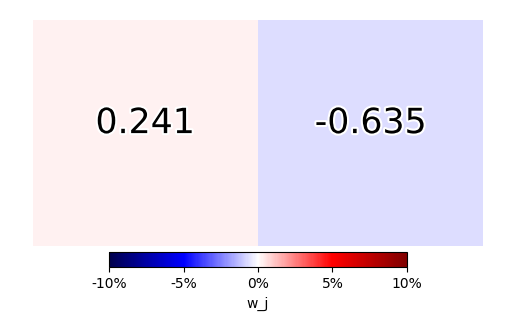

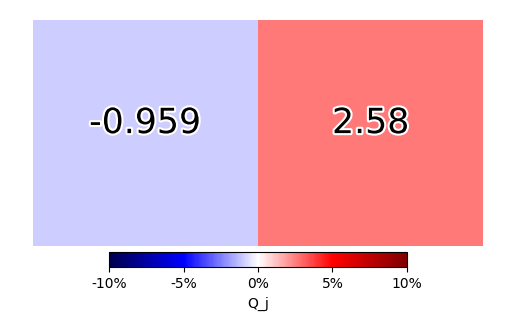

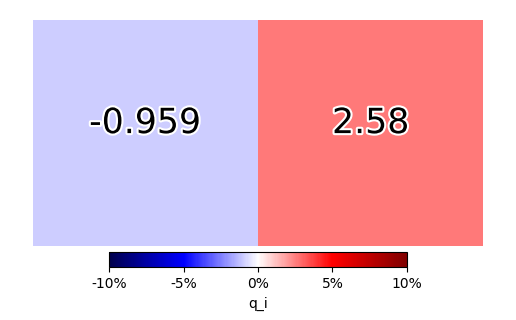

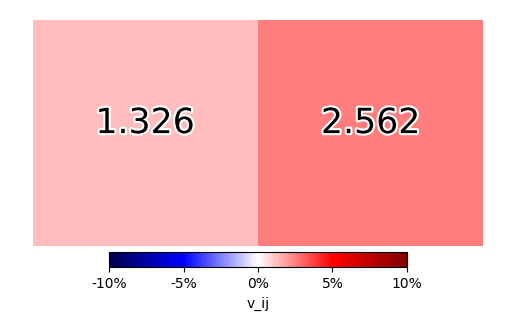

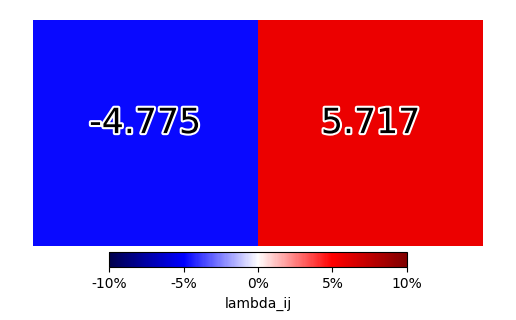

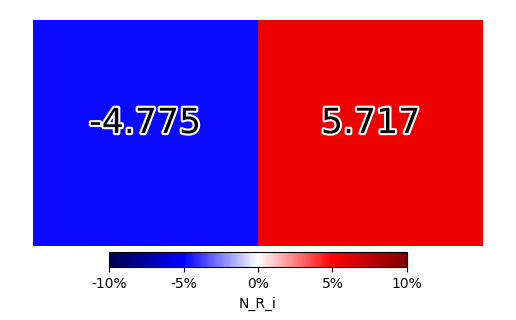

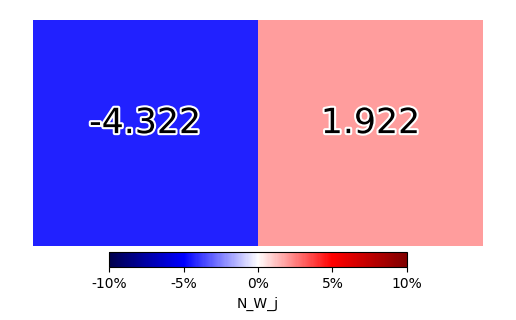

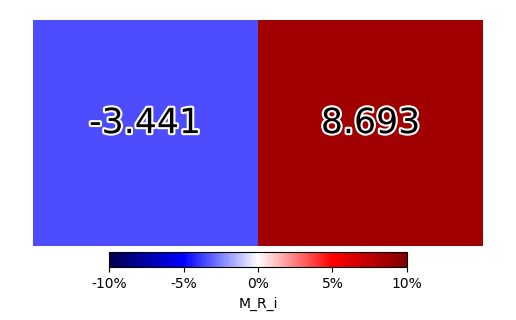

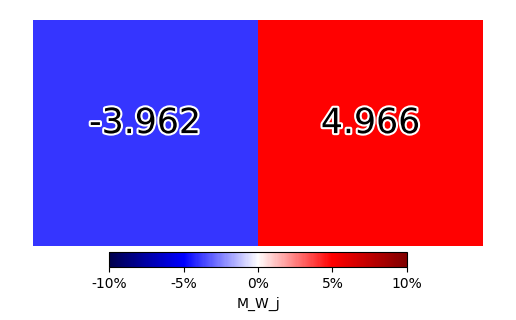

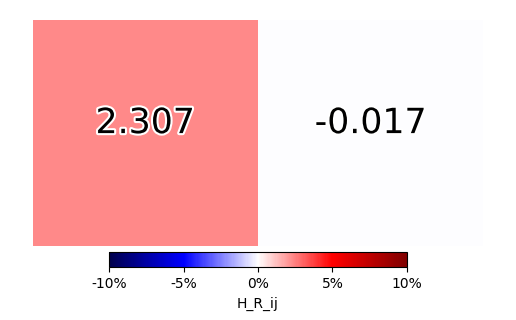

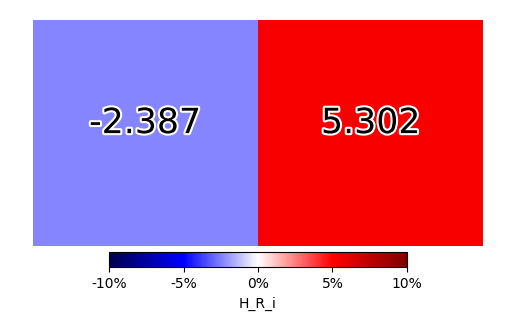

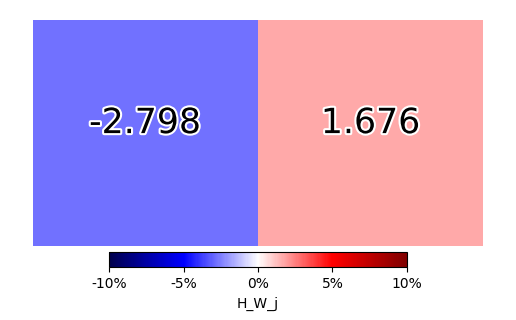

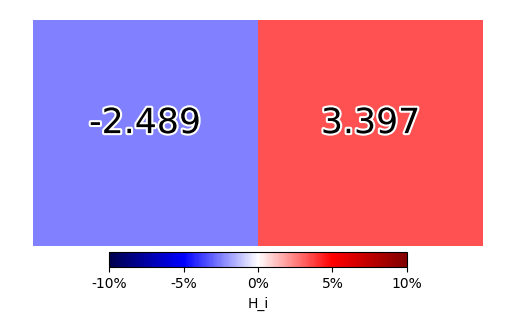

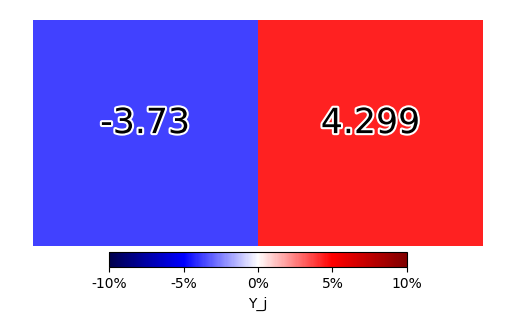

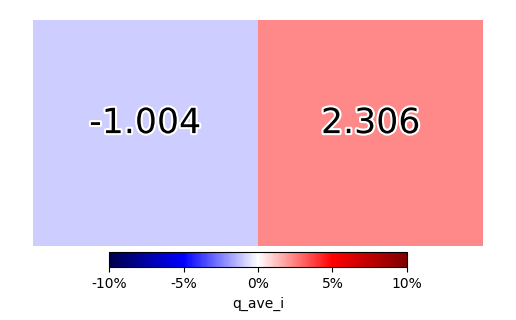

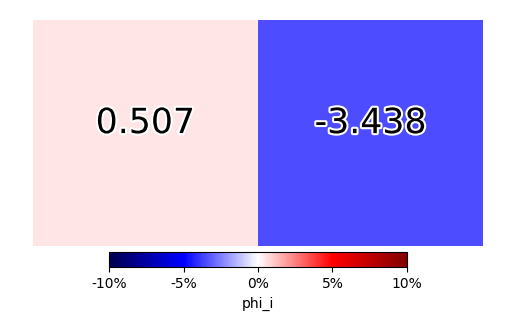

In [56]:
plot_change(gdf, 'w_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'Q_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'q_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'v_ij', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'lambda_ij', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'N_W_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'M_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'M_W_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'H_R_ij', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'H_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'H_W_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'H_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'Y_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'q_ave_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf, 'phi_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')